**Afshar - Q3**

این سوال در مورد عملکرد

ftt and conv function

در قسمت اول زمان محاسبه اف‌اف‌تی بر حسب طول سیگنال ورودی به آن بدست آمده است که نمودار آن در خروجی چاپ شده.

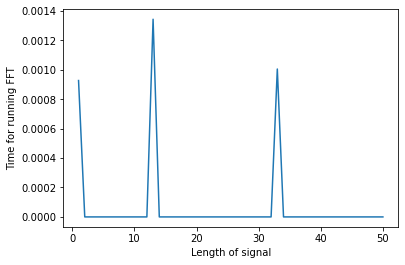

In [ ]:
#part 1 and 2
import numpy as np
from scipy.fftpack import fft
import time

N_values = np.arange(1, 51)
times = np.zeros(len(N_values))

for i, N in enumerate(N_values):
    x = np.random.rand(N)
    start_time = time.time()
    fft(x, N)
    times[i] = time.time() - start_time

# Plot the results
import matplotlib.pyplot as plt
plt.figure()
plt.plot(N_values, times)
plt.xlabel('Length of signal')
plt.ylabel('Time for running FFT')
plt.show()


part3

به ازای طول سیگنال هایی که توانی از دو هستند عملکرد بهینه تری خواهد داشت

part4

در این قسمت تابع کانوولوشن بررسی شده است. یکبار با استفاده از این تابع و بار دیگر با استفاده از توابع

fft and ifft

بررسی شده است و خروجی ها به صورت زیر میباشند.

In [ ]:
def conv_python(x, h):
    N1 = len(x)
    N2 = len(h)
    N = N1 + N2 - 1
    y = np.zeros(N)
    for n in range(N):
        for k in range(N1):
            if (n-k) < N2 and (n-k) >= 0:
                y[n] += x[k]*h[n-k]
    return y


In [ ]:
import numpy as np
from scipy.fftpack import fft, ifft
import time

L_values = [50, 1000]

for L in L_values:
    x = np.random.normal(0, 1, L)
    h = np.random.uniform(0, 1, L)

    # Using numpy.convolve function
    start_time = time.time()
    conv_numpy = conv_python(x, h)
    time_numpy = time.time() - start_time

    # Using FFT method
    N = int(2**np.ceil(np.log2(L + L - 1)))
    start_time = time.time()
    conv_fft = ifft(fft(x, N) * fft(h, N))
    time_fft = time.time() - start_time

    print("For L = {}:".format(L))
    print("Time for numpy.convolve function: {:.6f} s".format(time_numpy))
    print("Time for FFT method: {:.6f} s".format(time_fft))
    print()


For L = 50:
Time for numpy.convolve function: 0.007992 s
Time for FFT method: 0.000000 s

For L = 1000:
Time for numpy.convolve function: 1.618336 s
Time for FFT method: 0.000998 s

